# Spectral Clustering of deeznuts

In [35]:
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [36]:

n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)

X,y = noisy_circles

X = StandardScaler().fit_transform(X)

params = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 2,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

spectral = SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )

spectral.fit(X)

if hasattr(spectral, "labels_"):
    y_pred = spectral.labels_.astype(int)
else:
    y_pred = spectral.predict(X)




/Users/adrianaladera/opt/anaconda3/envs/deeznuts/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


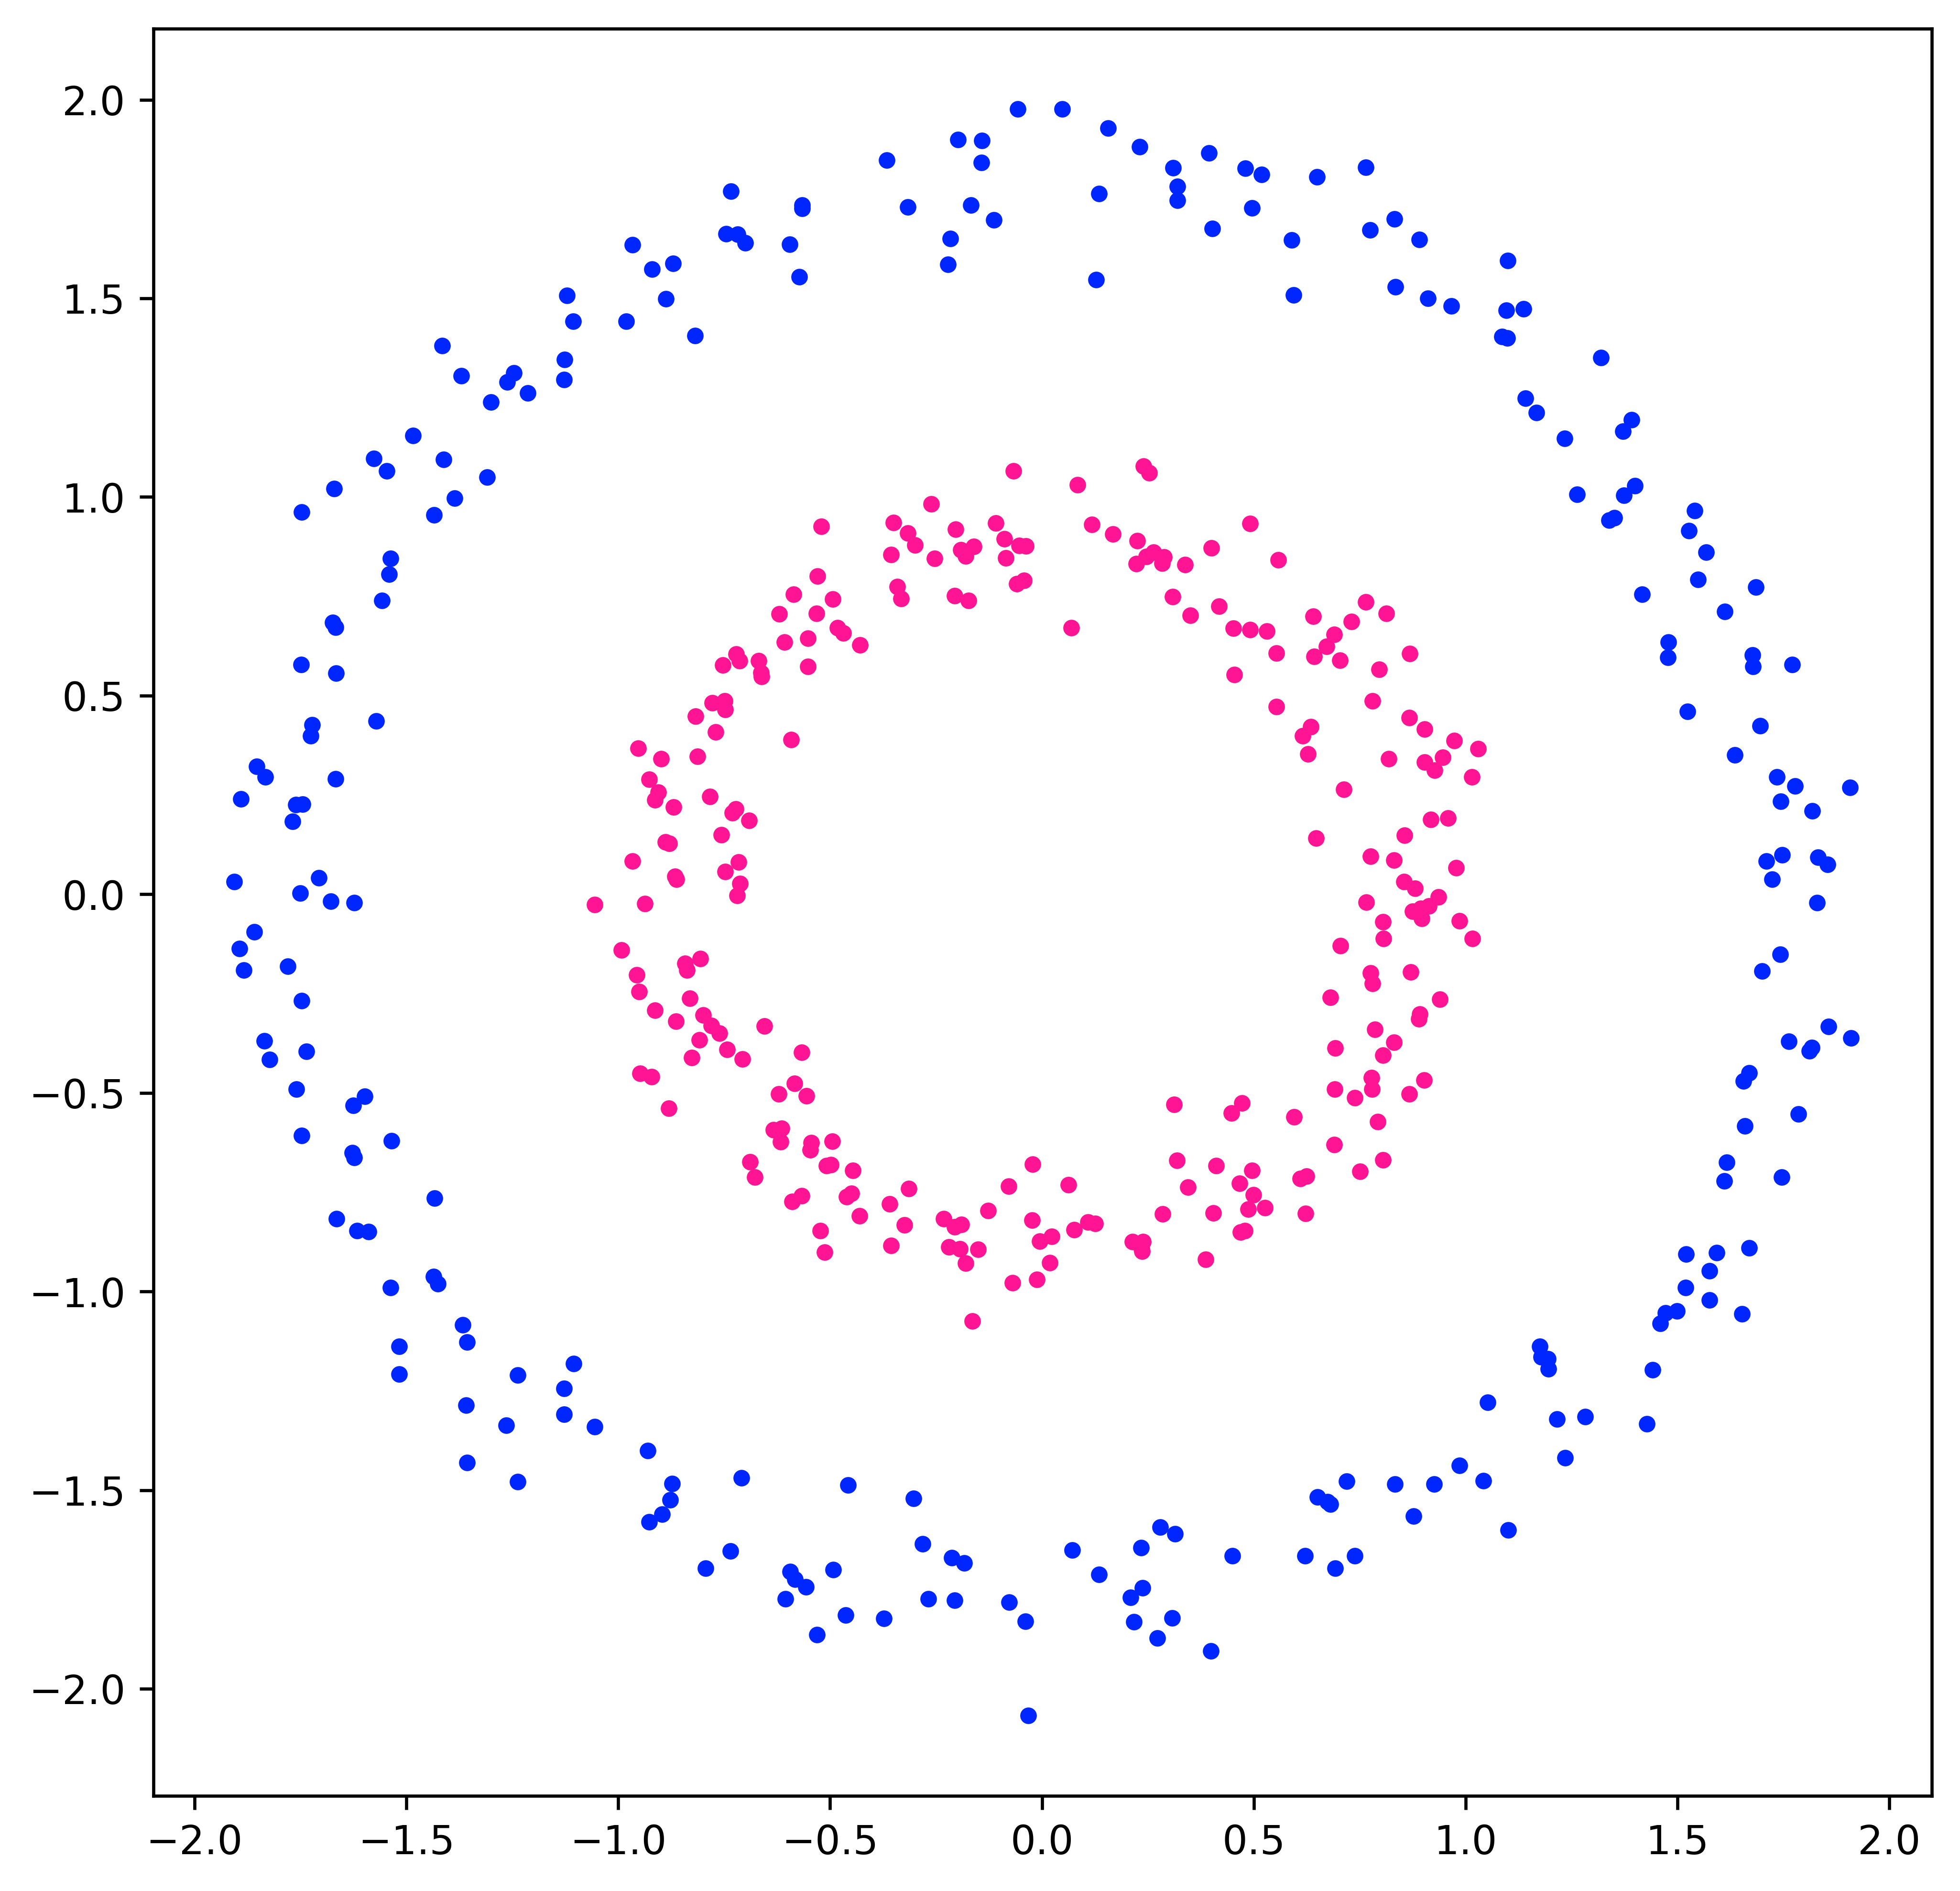

In [37]:
fuck, ax = plt.subplots(1, figsize=(8,8), dpi=600)
colors = {0: "#FF1493", 1:"#0026ff"}

for pc1, pc2, c in zip(X[:, 0], X[:, 1], y_pred):
    ax.scatter(pc1, pc2, s=10, color=colors[c])